<a href="https://colab.research.google.com/github/KOYYANAYESUKUMAR/FMML.LABS/blob/main/FMML_2024_Module_04_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Foundations of Modern Machine Learning, IIIT Hyderabad

Project: Perceptron and Gradient Descent

Note: Please write the code for the following tasks in separate code cells.  


# Notebook Imports and Packages

In [60]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Example 1 - A simple cost function

#### $$f(x) = x^2 + x + 1$$

In [59]:
def f(x):
    return x ** 2 + x + 1

In [58]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

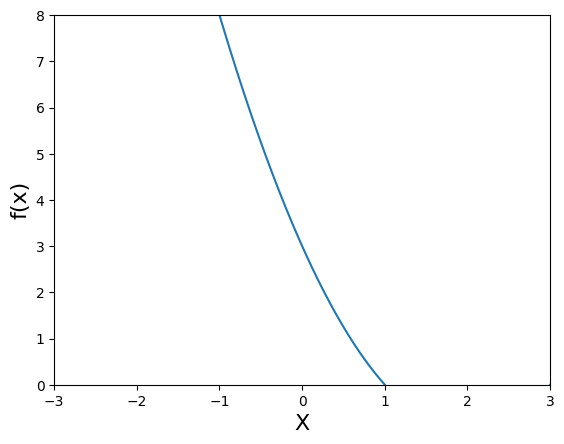

In [57]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

### Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [56]:
def df(x):
    return 2 * x + 1

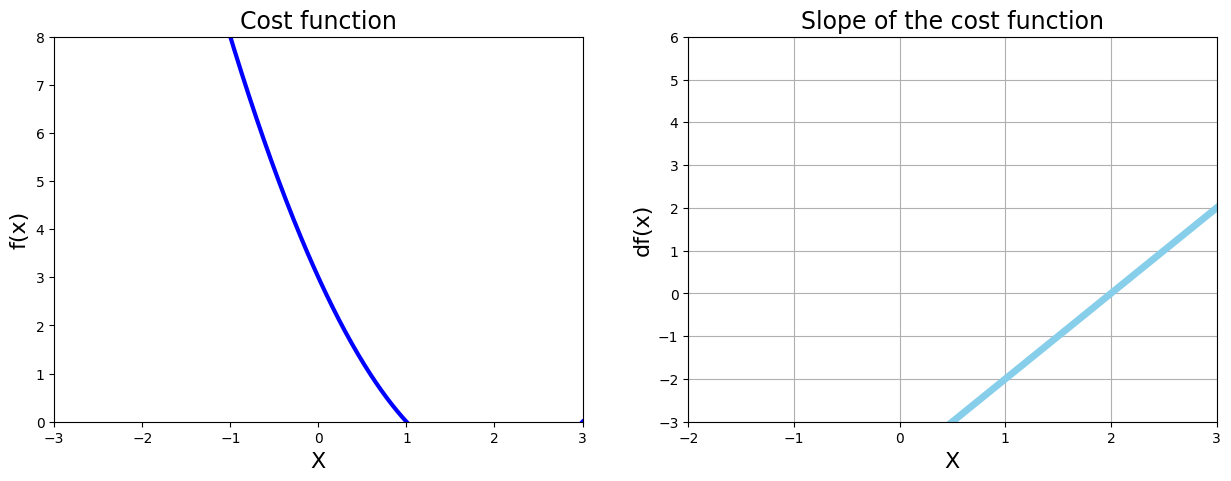

In [55]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

### Gradient Descent

In [1]:
# Define the functions for f(x) and its derivative df(x) as placeholders
def f(x):
    return x**2  # Example function, can be replaced with the actual function

def df(x):
    return 2 * x  # Derivative of f(x), replace with actual derivative if needed

# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # [REQUIRED]: Calculate the gradient using the derivative function
    new_x = previous_x - step_multiplier * gradient  # [REQUIRED]: Update new_x using gradient descent formula

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))  # [REQUIRED]: Append the derivative (slope) at the new x to slope_list

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 50
Local minimum occurs at: 3.425394462494306e-05
Slope or df(x) value at this point is: 6.850788924988612e-05
f(x) value or cost at this point is: 1.1733327223686654e-09


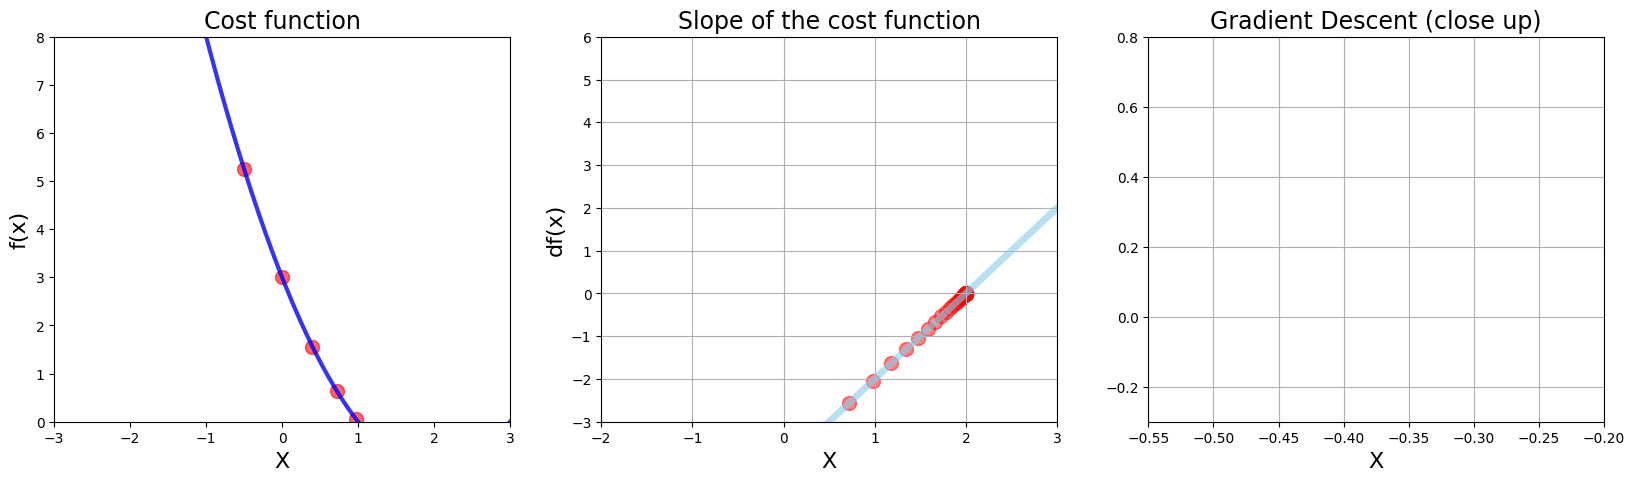

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Example cost function and its derivative
def f(x):
    return x**2 - 4*x + 3  # Example quadratic function

def df(x):
    return 2*x - 4  # Derivative of the above function

# Gradient Descent Algorithm
def gradient_descent(derivative_func, initial_guess, multiplier=0.1, precision=0.0001, max_iter=500):
    x = initial_guess
    x_list = [x]
    slope_list = [derivative_func(x)]

    for n in range(max_iter):
        prev_x = x
        x = x - multiplier * derivative_func(x)

        x_list.append(x)
        slope_list.append(derivative_func(x))

        if abs(x - prev_x) < precision:
            break

    return x_list, slope_list

# Gradient Descent
x_list, slope_list = gradient_descent(derivative_func=df, initial_guess=-0.5, multiplier=0.1)

# Plotting
x_1 = np.linspace(-3, 3, 500)  # Create a range of x values for plotting

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)
values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)
plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show()


### Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

#### $$g(x) = x^4 - 4x^2 + 5$$

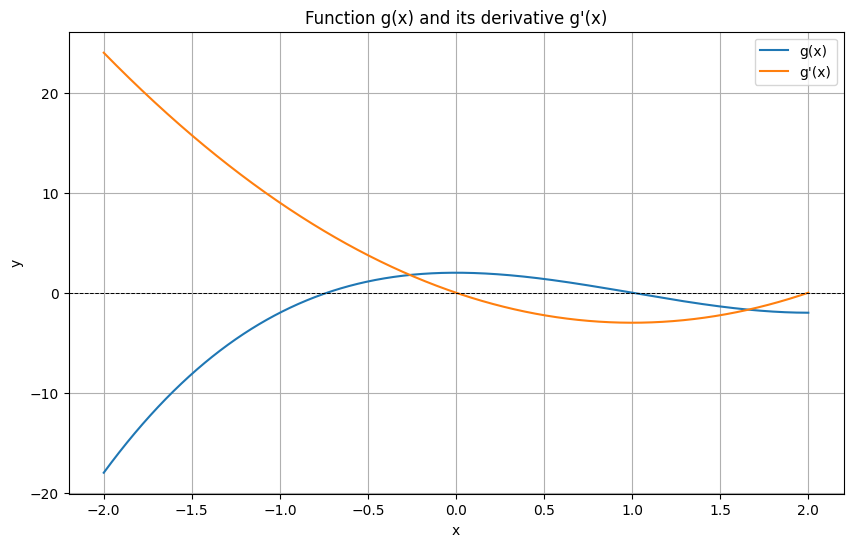

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Make some data
x_2 = np.linspace(-2, 2, 1000)

# Define the function g(x)
def g(x):
    return x**3 - 3*x**2 + 2  # [REQUIRED]: Example function, replace with your specific function

# Define the derivative dg(x)
def dg(x):
    return 3*x**2 - 6*x  # [REQUIRED]: Derivative of g(x), replace with the derivative of your specific function

# Optional: Plot the function and its derivative to visualize
plt.figure(figsize=(10, 6))
plt.plot(x_2, g(x_2), label='g(x)')
plt.plot(x_2, dg(x_2), label="g'(x)")
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.legend()
plt.title('Function g(x) and its derivative g\'(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


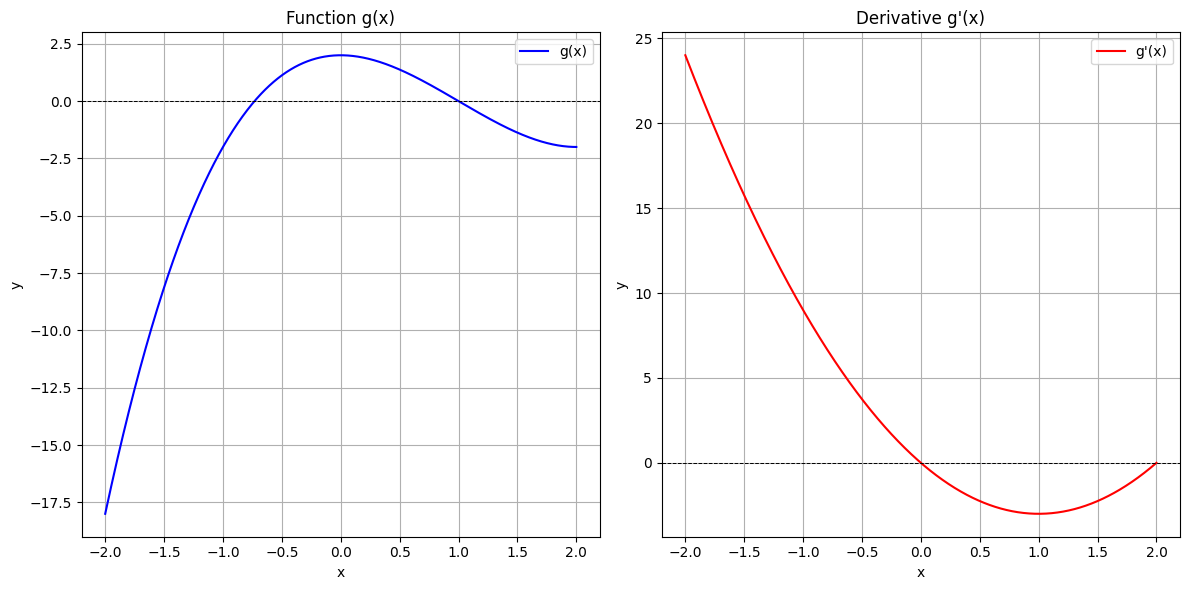

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Make some data
x_2 = np.linspace(-2, 2, 1000)

# Define the function g(x)
def g(x):
    return x**3 - 3*x**2 + 2  # Example function, replace with your specific function

# Define the derivative dg(x)
def dg(x):
    return 3*x**2 - 6*x  # Derivative of g(x), replace with your specific derivative

# Plot the function and its derivative side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot g(x)
axes[0].plot(x_2, g(x_2), label='g(x)', color='blue')
axes[0].axhline(0, color='black', linewidth=0.7, linestyle='--')
axes[0].set_title('Function g(x)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid()
axes[0].legend()

# Plot g'(x)
axes[1].plot(x_2, dg(x_2), label="g'(x)", color='red')
axes[1].axhline(0, color='black', linewidth=0.7, linestyle='--')
axes[1].set_title('Derivative g\'(x)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].grid()
axes[1].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


## Gradient Descent

In [52]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [51]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.9766784705183265
Number of steps: 103


In [50]:
import numpy as np

# Example cost function g(x) and its derivative dg(x)
def g(x):
    return x**2 - 4*x + 3  # Just an example quadratic function

def dg(x):
    return 2*x - 4  # Derivative of g(x)

# Gradient descent function
def gradient_descent(derivative_func, initial_guess, multiplier=0.1, precision=0.0001, max_iter=500):
    x = initial_guess
    x_list = [x]
    deriv_list = [derivative_func(x)]

    for n in range(max_iter):
        prev_x = x
        x = x - multiplier * derivative_func(x)  # Update x using the gradient

        x_list.append(x)
        deriv_list.append(derivative_func(x))

        if abs(x - prev_x) < precision:  # Stop when change in x is smaller than precision
            break

    return x, x_list, deriv_list

# Running gradient descent
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


Local min occurs at: 1.9951381965479744
Number of steps: 310


In [48]:
import numpy as np

# Define the function and its derivative (for example, f(x) = x^2 - 4x + 3)
def g(x):
    return x**2 - 4*x + 3

def dg(x):
    return 2*x - 4  # Derivative of g(x)

# Gradient descent function
def gradient_descent(derivative_func, initial_guess, step_size=0.1, precision=0.0001, max_iter=500):
    x = initial_guess
    x_list = [x]
    deriv_list = [derivative_func(x)]

    for n in range(max_iter):
        prev_x = x
        x = x - step_size * derivative_func(x)  # Update the value of x

        x_list.append(x)
        deriv_list.append(derivative_func(x))

        if abs(x - prev_x) < precision:  # Stop if the change is smaller than precision
            break

    return x, x_list, deriv_list

# Running gradient descent
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


Local min occurs at: 1.9996510776511065
Number of steps: 40


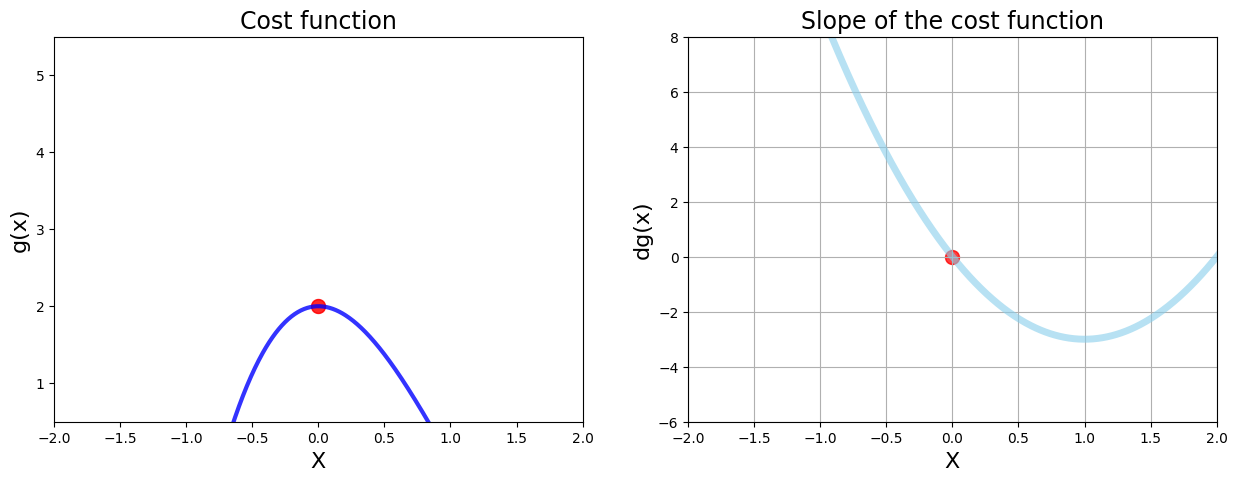

In [46]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

### Example 3 - Divergence and Overflow

#### $$h(x) = x^5 - 2x^4 + 2$$

Converged after iterations: 0
Final x: 0.0
Slope or dh(x) value at this point: 0.0
h(x) value or cost at this point: 2.0


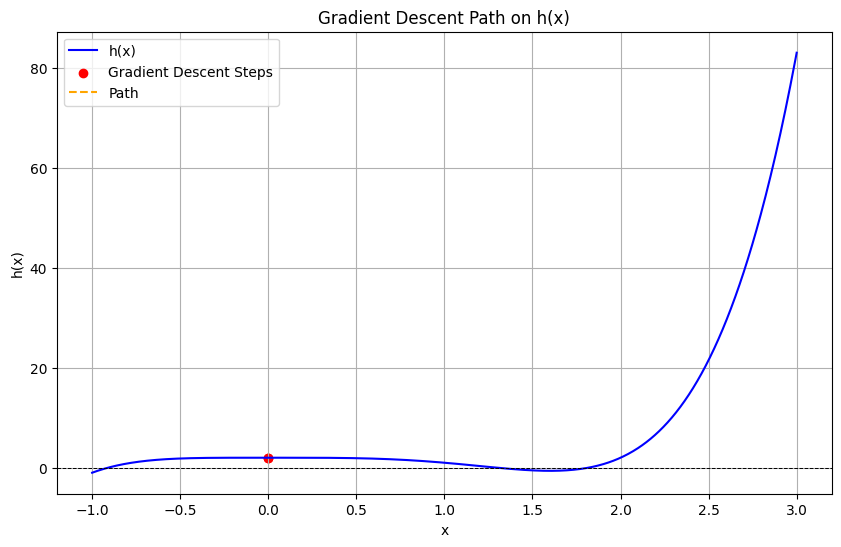

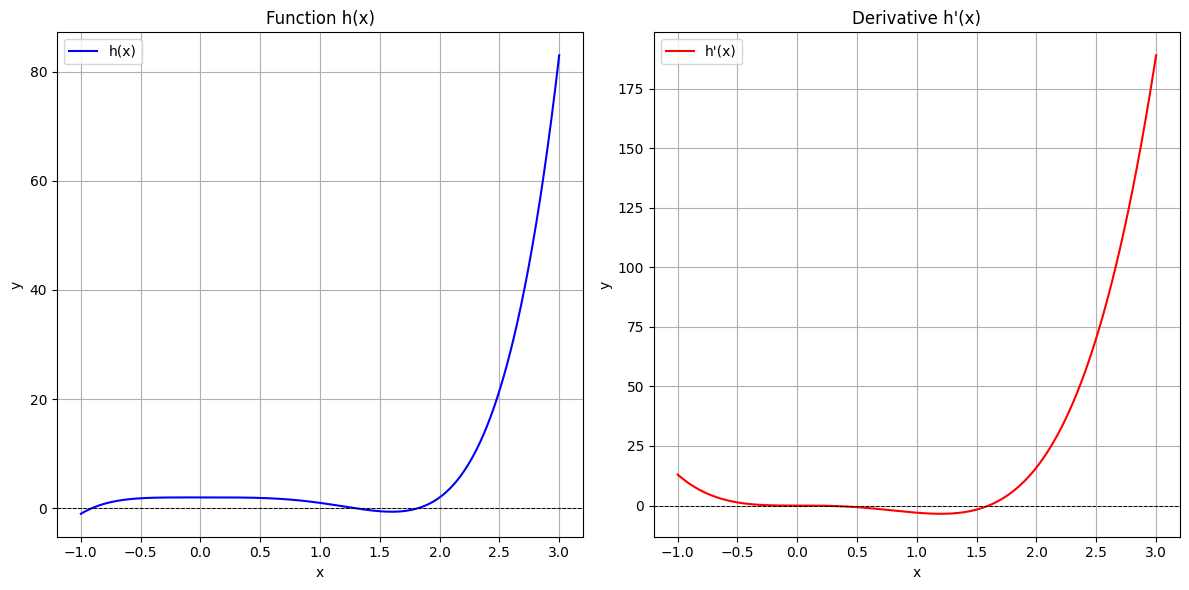

In [5]:
## TASK-4 : Code the same things as they were done for the first two examples

# Define h(x) and its derivative h'(x)
def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3  # Derivative of h(x)

 # Gradient Descent for h(x)
new_x = 0  # Initial guess
previous_x = 0
step_multiplier = 0.001  # Use a small step size
precision = 0.00001
max_iterations = 500
divergence_threshold = 1e6  # Prevent overflow by defining a divergence threshold

x_list = [new_x]
slope_list = [dh(new_x)]

for n in range(max_iterations):
    previous_x = new_x
    gradient = dh(previous_x)
    new_x = previous_x - step_multiplier * gradient  # Update x using gradient descent

    # Monitor if x diverges
    if abs(new_x) > divergence_threshold:
        print("Divergence detected. Gradient descent terminated.")
        break

    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(dh(new_x))

    if step_size < precision:
        print('Converged after iterations:', n)
        break

print('Final x:', new_x)
print('Slope or dh(x) value at this point:', dh(new_x))
print('h(x) value or cost at this point:', h(new_x))

# Visualize the function h(x) and the gradient descent path
x_vals = np.linspace(-1, 3, 1000)
y_vals = h(x_vals)

plt.figure(figsize=(10, 6))

# Plot h(x)
plt.plot(x_vals, y_vals, label='h(x)', color='blue')

# Highlight gradient descent steps
plt.scatter(x_list, [h(x) for x in x_list], color='red', label='Gradient Descent Steps')
plt.plot(x_list, [h(x) for x in x_list], color='orange', linestyle='--', label='Path')

plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.title('Gradient Descent Path on h(x)')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend()
plt.grid()
plt.show()

# Plot h(x) and h'(x) side by side
x_2 = np.linspace(-1, 3, 1000)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot h(x)
axes[0].plot(x_2, h(x_2), label='h(x)', color='blue')
axes[0].axhline(0, color='black', linewidth=0.7, linestyle='--')
axes[0].set_title('Function h(x)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid()
axes[0].legend()

# Plot h'(x)
axes[1].plot(x_2, dh(x_2), label="h'(x)", color='red')
axes[1].axhline(0, color='black', linewidth=0.7, linestyle='--')
axes[1].set_title('Derivative h\'(x)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].grid()
axes[1].legend()

plt.tight_layout()
plt.show()


#### Learning Rate

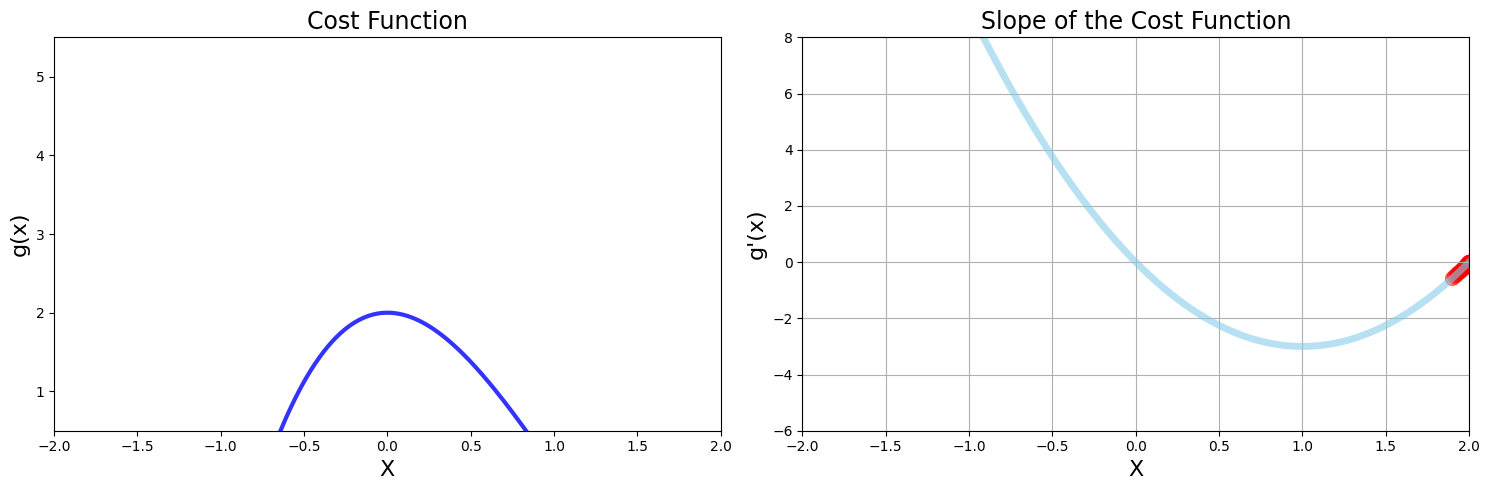

Number of steps is:  40
Local minimum occurs at x = 1.9991769106921562
g(x) at this minimum is: -1.9999979681295983


In [8]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, precision=0.0001, max_iter=500):
    """
    Performs gradient descent to find the local minimum of a function.

    Parameters:
        derivative_func: Function for the derivative.
        initial_guess: Starting point for gradient descent.
        multiplier: Learning rate or step size.
        precision: Minimum change in x for convergence.
        max_iter: Maximum number of iterations.

    Returns:
        local_min: The local minimum found.
        list_x: List of x values during gradient descent.
        deriv_list: List of derivative values during gradient descent.
    """
    x = initial_guess
    list_x = [x]
    deriv_list = [derivative_func(x)]

    for i in range(max_iter):
        gradient = derivative_func(x)
        new_x = x - multiplier * gradient
        list_x.append(new_x)
        deriv_list.append(derivative_func(new_x))

        if abs(new_x - x) < precision:  # Convergence condition
            break

        x = new_x

    local_min = x
    return local_min, list_x, deriv_list

# Define the g(x) function and its derivative
def g(x):
    return x**3 - 3*x**2 + 2  # Example cubic function

def dg(x):
    return 3*x**2 - 6*x  # Derivative of g(x)

# Call gradient descent
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                 multiplier=0.02, max_iter=500)

# Visualization: Function and derivative with gradient descent path
x_2 = np.linspace(-2, 2, 1000)

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel("g'(x)", fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.tight_layout()
plt.show()

print('Number of steps is: ', len(list_x))
print('Local minimum occurs at x =', local_min)
print('g(x) at this minimum is:', g(local_min))


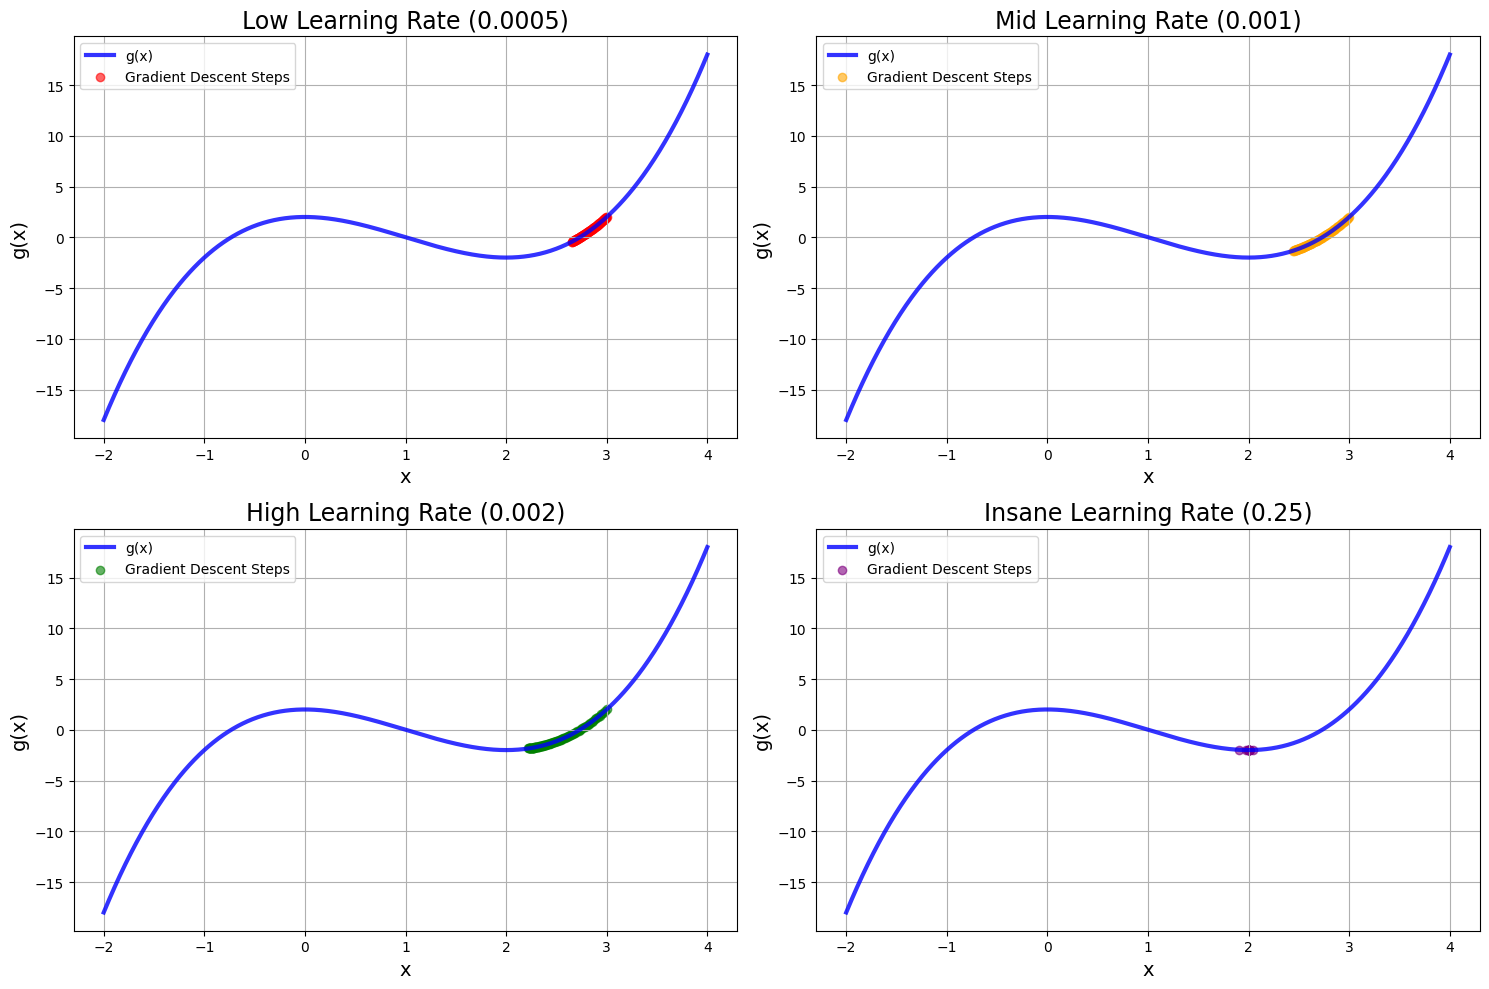

In [10]:
# Define the g(x) function and its derivative
def g(x):
    return x**3 - 3*x**2 + 2  # Example cubic function

def dg(x):
    return 3*x**2 - 6*x  # Derivative of g(x)

# Gradient Descent with low, mid, and high learning rates
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment with an insane learning rate
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# Visualization: Gradient descent with different learning rates
x_2 = np.linspace(-2, 4, 1000)

plt.figure(figsize=[15, 10])

# 1. Low Gamma
plt.subplot(2, 2, 1)
plt.title('Low Learning Rate (0.0005)', fontsize=17)
plt.plot(x_2, g(x_2), color='blue', label='g(x)', linewidth=3, alpha=0.8)
plt.scatter(low_gamma[1], g(np.array(low_gamma[1])), color='red', label='Gradient Descent Steps', alpha=0.6)
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)
plt.legend()
plt.grid()

# 2. Mid Gamma
plt.subplot(2, 2, 2)
plt.title('Mid Learning Rate (0.001)', fontsize=17)
plt.plot(x_2, g(x_2), color='blue', label='g(x)', linewidth=3, alpha=0.8)
plt.scatter(mid_gamma[1], g(np.array(mid_gamma[1])), color='orange', label='Gradient Descent Steps', alpha=0.6)
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)
plt.legend()
plt.grid()

# 3. High Gamma
plt.subplot(2, 2, 3)
plt.title('High Learning Rate (0.002)', fontsize=17)
plt.plot(x_2, g(x_2), color='blue', label='g(x)', linewidth=3, alpha=0.8)
plt.scatter(high_gamma[1], g(np.array(high_gamma[1])), color='green', label='Gradient Descent Steps', alpha=0.6)
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)
plt.legend()
plt.grid()

# 4. Insane Gamma
plt.subplot(2, 2, 4)
plt.title('Insane Learning Rate (0.25)', fontsize=17)
plt.plot(x_2, g(x_2), color='blue', label='g(x)', linewidth=3, alpha=0.8)
plt.scatter(insane_gamma[1], g(np.array(insane_gamma[1])), color='purple', label='Gradient Descent Steps', alpha=0.6)
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


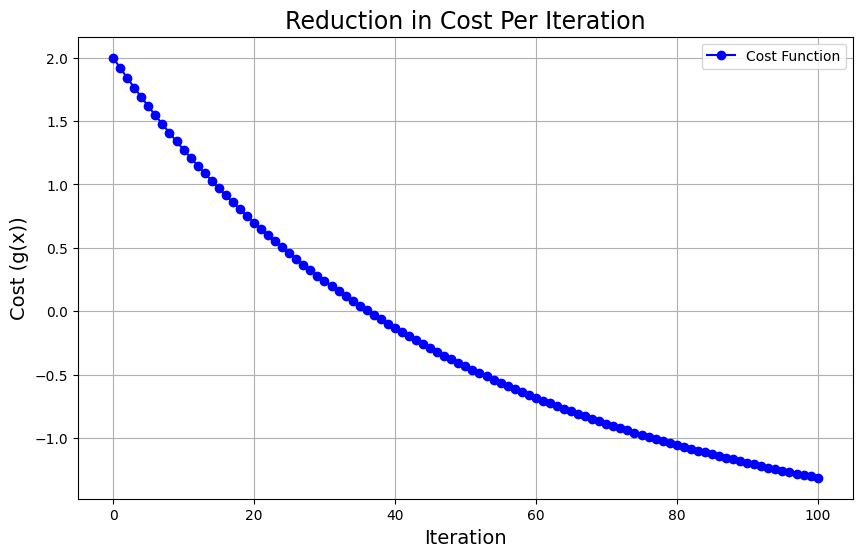

In [45]:
## TASK-7 : Plot reduction in cost for each iteration
# Gradient descent function already defined
# g(x) and dg(x) functions already defined

# Run gradient descent with a selected learning rate (example: mid_gamma)
n = 100  # Maximum number of iterations
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, max_iter=n)

# Calculate the cost (g(x)) at each iteration
cost_list = [g(x) for x in list_x]

# Plot reduction in cost
plt.figure(figsize=(10, 6))
plt.title('Reduction in Cost Per Iteration', fontsize=17)
plt.plot(range(len(cost_list)), cost_list, marker='o', linestyle='-', color='blue', label='Cost Function')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Cost (g(x))', fontsize=14)
plt.grid()
plt.legend()
plt.show()


### Example 4 - Data Viz with 3D Charts

#### Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

<ipython-input-13-43c1e9719c13>:29: RuntimeWarning: invalid value encountered in scalar subtract
  if np.linalg.norm([new_x - x, new_y - y]) < precision:


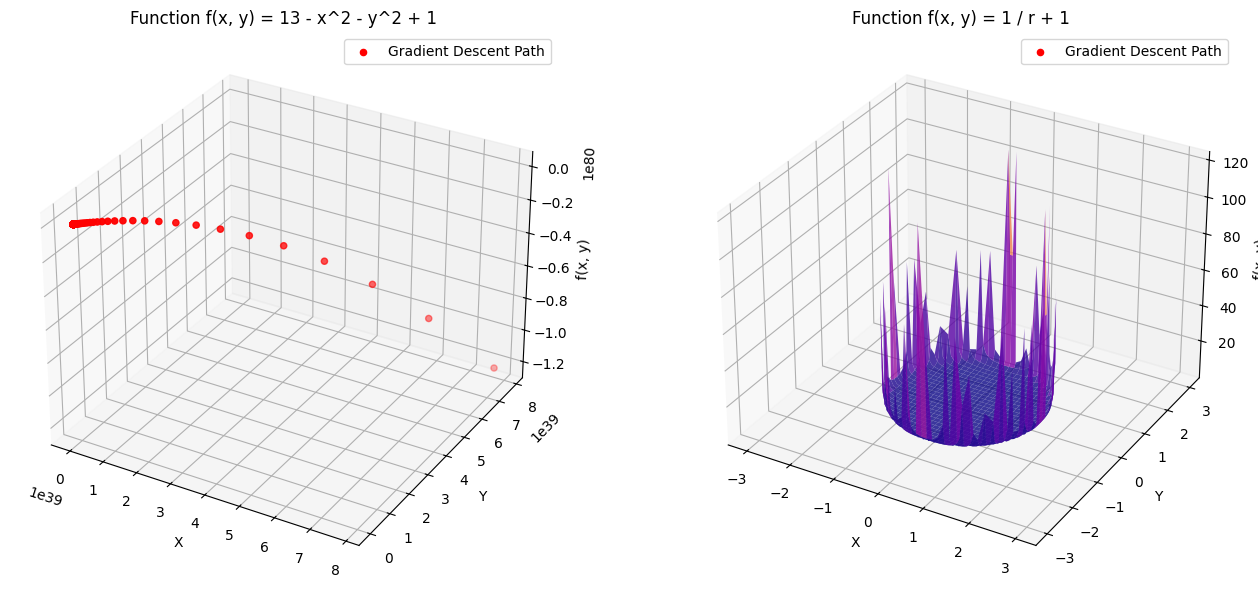

In [13]:
## TASK-8 : Code the same things as they were done for the first two examples
def f1(x, y):
    return 13 - x**2 - y**2 + 1

def grad_f1(x, y):
    df_dx = -2 * x
    df_dy = -2 * y
    return np.array([df_dx, df_dy])

def f2(x, y):
    r = 3 - x**2 - y**2
    return 1 / r + 1 if r > 0 else np.inf

def grad_f2(x, y):
    r = 3 - x**2 - y**2
    if r <= 0:  # To avoid division by zero or undefined gradient
        return np.array([np.inf, np.inf])
    df_dx = -2 * x / (r**2)
    df_dy = -2 * y / (r**2)
    return np.array([df_dx, df_dy])

def gradient_descent_3d(func_grad, initial_guess, learning_rate=0.1, precision=0.0001, max_iter=500):
    x, y = initial_guess
    path = [(x, y)]
    for _ in range(max_iter):
        gradient = func_grad(x, y)
        new_x, new_y = np.array([x, y]) - learning_rate * gradient
        path.append((new_x, new_y))
        if np.linalg.norm([new_x - x, new_y - y]) < precision:
            break
        x, y = new_x, new_y
    return np.array(path)

# Create a grid of x, y values
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z for both functions
Z1 = f1(X, Y)
Z2 = np.array([[f2(x, y) for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])


fig = plt.figure(figsize=(14, 6))

# 3D plot for f1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='viridis', alpha=0.8)
ax1.set_title('Function f(x, y) = 13 - x^2 - y^2 + 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(x, y)')

# Gradient Descent Path for f1
path_f1 = gradient_descent_3d(grad_f1, initial_guess=(2, 2), learning_rate=0.1)
ax1.scatter(path_f1[:, 0], path_f1[:, 1], [f1(x, y) for x, y in path_f1], color='red', label='Gradient Descent Path')
ax1.legend()

# 3D plot for f2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z2, cmap='plasma', alpha=0.8)
ax2.set_title('Function f(x, y) = 1 / r + 1')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('f(x, y)')

# Gradient Descent Path for f2
path_f2 = gradient_descent_3d(grad_f2, initial_guess=(1.5, 1.5), learning_rate=0.01)
ax2.scatter(path_f2[:, 0], path_f2[:, 1], [f2(x, y) for x, y in path_f2], color='red', label='Gradient Descent Path')
ax2.legend()

plt.tight_layout()
plt.show()


In [11]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


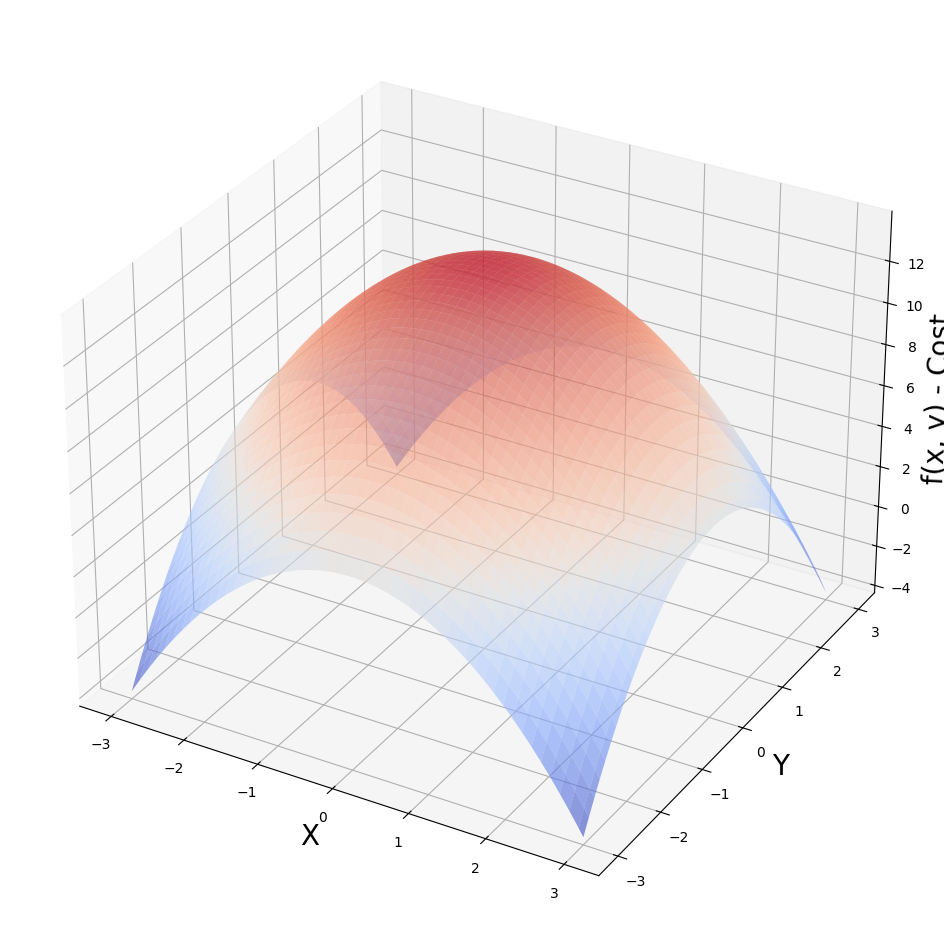

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the function f(x, y)
def f(x, y):
    return 13 - x**2 - y**2 + 1

# Generate meshgrid for x and y values
x_4 = np.linspace(-3, 3, 100)  # X values from -3 to 3
y_4 = np.linspace(-3, 3, 100)  # Y values from -3 to 3
x_4, y_4 = np.meshgrid(x_4, y_4)  # Create a meshgrid

# Calculate the function values on the grid
z_4 = f(x_4, y_4)

# Create the 3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

# Set labels for the axes
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Plot the surface
ax.plot_surface(x_4, y_4, z_4, cmap=cm.coolwarm, alpha=0.6)

# Show the plot
plt.show()


### TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.


#### Partial Derivatives & Symbolic Computation

#### $$\frac{\partial f}{\partial x} = ## [REQUIRED]

#### $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [15]:
from sympy import symbols, diff

# Define symbolic variables x and y
a, b = symbols('x y')

# Define the cost function f(x, y)
def f(x, y):
    return 13 - x**2 - y**2 + 1  # You can replace this with any other function

# Calculate the partial derivatives
partial_derivative_wrt_x = diff(f(a, b), a)  # Derivative wrt x
partial_derivative_wrt_y = diff(f(a, b), b)  # Derivative wrt y

# Print the cost function and partial derivatives
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', partial_derivative_wrt_x)
print('Partial derivative wrt y is: ', partial_derivative_wrt_y)

# Evaluate the function and derivatives at x=1.8, y=1.0
print('Value of f(x,y) at x=1.8, y=1.0 is: ', f(a, b).evalf(subs={a: 1.8, b: 1.0}))
print('Value of partial derivative wrt x at x=1.8, y=1.0 is: ', partial_derivative_wrt_x.evalf(subs={a: 1.8, b: 1.0}))
print('Value of partial derivative wrt y at x=1.8, y=1.0 is: ', partial_derivative_wrt_y.evalf(subs={a: 1.8, b: 1.0}))


Our cost function f(x, y) is:  -x**2 - y**2 + 14
Partial derivative wrt x is:  -2*x
Partial derivative wrt y is:  -2*y
Value of f(x,y) at x=1.8, y=1.0 is:  9.76000000000000
Value of partial derivative wrt x at x=1.8, y=1.0 is:  -3.60000000000000
Value of partial derivative wrt y at x=1.8, y=1.0 is:  -2.00000000000000


#### Batch Gradient Descent with SymPy

*   List item
*   List item



In [16]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [-1.16881096857237e+40 -6.49339426984649e+39]
Minimum occurs at x value of:  7.01286581143421e+39
Minimum occurs at y value of:  3.89603656190789e+39
The cost is:  -6.43593877809059e+79


In [18]:
# Partial derivative functions example 4
def fpx(x, y):
    return -2 * x  # Partial derivative of f(x, y) with respect to x

def fpy(x, y):
    return -2 * y  # Partial derivative of f(x, y) with respect to y


In [19]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [-1.16881097e+40 -6.49339427e+39]
Minimum occurs at x value of:  7.012865811434208e+39
Minimum occurs at y value of:  3.896036561907893e+39
The cost is:  -6.435938778090586e+79




```
#### This is formatted as code
```

### Graphing 3D Gradient Descent

In [20]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [-2.05764507e+16 -1.14313615e+16]
Minimum occurs at x value of:  1.2345870427072304e+16
Minimum occurs at y value of:  6858816903929058.0
The cost is:  -1.9946388592368145e+32


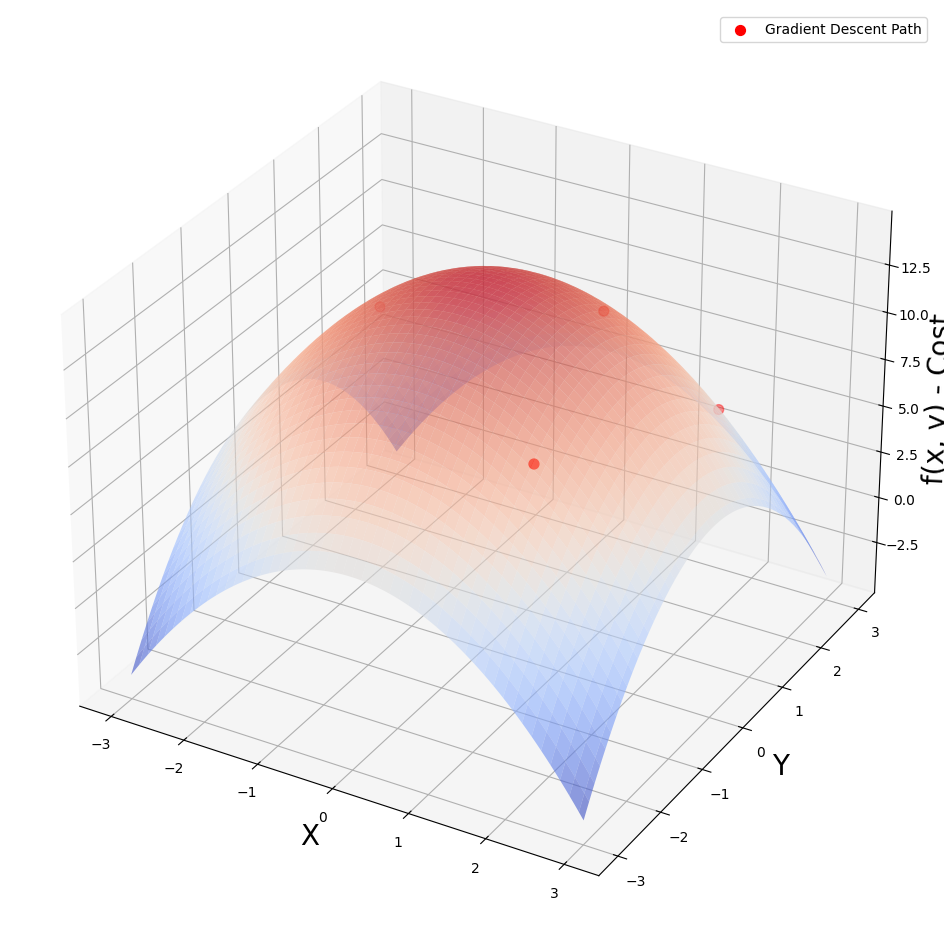

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the cost function f(x, y)
def f(x, y):
    return 13 - x**2 - y**2 + 1  # Example cost function

# Create meshgrid for x and y
x_4 = np.linspace(-3, 3, 100)
y_4 = np.linspace(-3, 3, 100)
x_4, y_4 = np.meshgrid(x_4, y_4)

# Create the surface data
z_4 = f(x_4, y_4)

# Example values_array (This could be a set of points from a gradient descent path)
# Here, I generate some random values as an example
values_array = np.array([[1.0, 1.0], [2.0, 2.0], [1.5, -1.5], [-2.0, 1.0]])

# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

# Set labels
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Plot the surface
ax.plot_surface(x_4, y_4, z_4, cmap=cm.coolwarm, alpha=0.6)

# Scatter plot for the values_array points
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red', label="Gradient Descent Path")

# Show the plot
plt.legend()
plt.show()


#### For Reference, practice and play with the code below

### Example 5 - Working with data & a real cost function

#### Mean Squared Error: a cost function for regression problems

#### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [23]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Example data (replace these with your actual data)
# x_5 should be a 2D array (n_samples, n_features) for sklearn
x_5 = np.array([[1], [2], [3], [4], [5]])  # Independent variable (e.g., years, size, etc.)
y_5 = np.array([3, 6, 9, 12, 15])  # Dependent variable (e.g., prices, output, etc.)

# Create the linear regression model
regr = LinearRegression()

# Fit the model
regr.fit(x_5, y_5)

# Print the results
print('Theta 0 (Intercept):', regr.intercept_)  # Intercept (θ₀)
print('Theta 1 (Coefficient):', regr.coef_[0])  # Coefficient (θ₁)


Theta 0 (Intercept): -3.552713678800501e-15
Theta 1 (Coefficient): 3.000000000000001


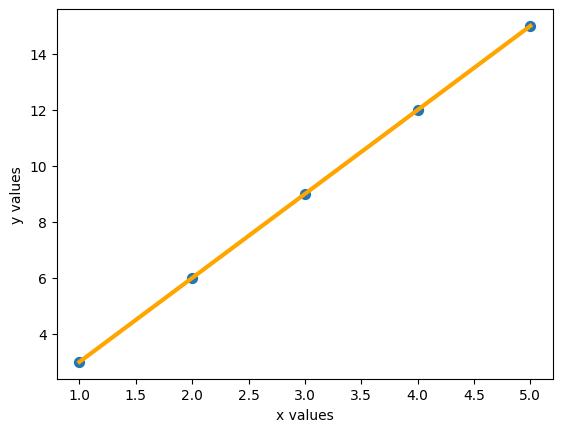

In [26]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [27]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[2.07026161]
 [3.29298808]
 [4.51571454]
 [5.738441  ]
 [6.96116747]]
In comparison, the actual y values are 
 [ 3  6  9 12 15]


In [28]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example data
x_5 = np.array([[1], [2], [3], [4], [5]])  # Independent variable
y_5 = np.array([3, 6, 9, 12, 15])  # Dependent variable

# Create the linear regression model
regr = LinearRegression()

# Fit the model
regr.fit(x_5, y_5)

# Predict values using the model
y_hat = regr.predict(x_5)

# Manually calculated MSE
def mse(true_values, predicted_values):
    return np.mean((true_values - predicted_values) ** 2)

# Print results
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mse(y_5, y_hat))  # Manual calculation
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))  # Using sklearn's built-in function


Manually calculated MSE is: 2.0510383535746308e-30
MSE regression using manual calc is 2.0510383535746308e-30
MSE regression is 2.0510383535746308e-30


#### 3D Plot for the MSE Cost Function

#### Make data for thetas

In [31]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


#### Calc MSE using nested for loops

In [32]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


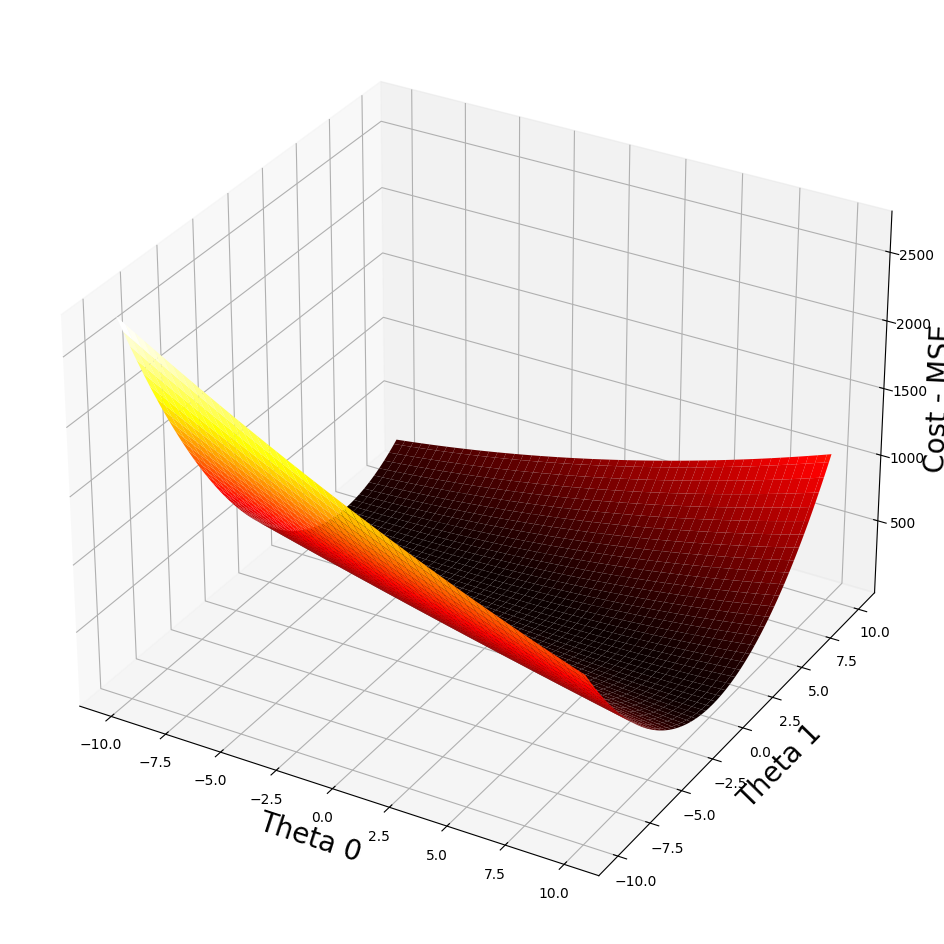

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Example data (replace these with your actual data)
x_5 = np.array([[1], [2], [3], [4], [5]])  # Independent variable
y_5 = np.array([3, 6, 9, 12, 15])  # Dependent variable

# Define the MSE function
def mse(true_values, predicted_values):
    return np.mean((true_values - predicted_values) ** 2)

# Generate a grid of theta_0 (intercept) and theta_1 (slope) values
theta_0_range = np.linspace(-10, 10, 100)  # Range for theta_0
theta_1_range = np.linspace(-10, 10, 100)  # Range for theta_1
plot_t0, plot_t1 = np.meshgrid(theta_0_range, theta_1_range)

# Initialize the plot_cost array
plot_cost = np.zeros_like(plot_t0)

# Compute MSE for each combination of theta_0 and theta_1
for i in range(len(theta_0_range)):
    for j in range(len(theta_1_range)):
        # Calculate the predictions for each theta_0, theta_1 pair
        y_hat = plot_t0[i, j] + plot_t1[i, j] * x_5.ravel()
        # Compute the MSE
        plot_cost[i, j] = mse(y_5, y_hat)

# Generating the 3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

# Set labels
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Plot the surface
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)

# Show the plot
plt.show()


In [39]:
# Find the minimum value of plot_cost (MSE)
print('Min value of plot_cost:', plot_cost.min())

# Get the indices where the minimum occurs
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i, j):', ij_min)

# Print the values of theta_0 and theta_1 at the corresponding indices
# Note: ij_min gives us the indices (i, j), so we can access the values in plot_t0 and plot_t1
print('Min MSE for Theta 0 at plot_t0[{}][{}]:'.format(ij_min[0], ij_min[1]), plot_t0[ij_min])
print('Min MSE for Theta 1 at plot_t1[{}][{}]:'.format(ij_min[0], ij_min[1]), plot_t1[ij_min])


Min value of plot_cost: 0.018263442505866638
Min occurs at (i, j): (64, 51)
Min MSE for Theta 0 at plot_t0[64][51]: 0.30303030303030276
Min MSE for Theta 1 at plot_t1[64][51]: 2.929292929292929


#### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

#### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

#### MSE & Gradient Descent

In [36]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

Min occurs at Theta 0: 8.999999747348431
Min occurs at Theta 1: 6.998043333203947e-08
Final MSE: 18.00000000000001


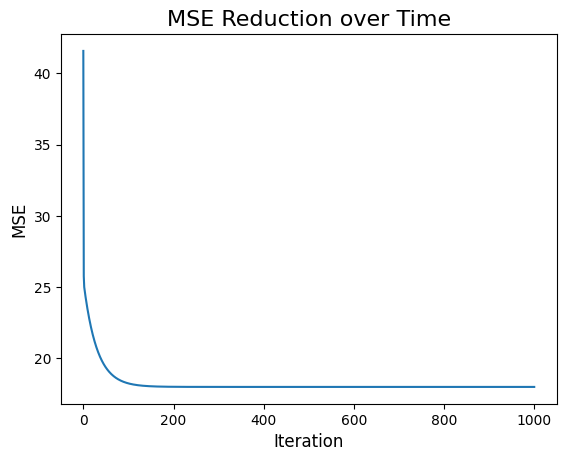

In [41]:
def grad(x, y, thetas):
    # Extracting the parameters
    theta_0, theta_1 = thetas

    # Predictions
    y_pred = theta_0 + theta_1 * x

    # Gradients with respect to theta_0 and theta_1
    grad_theta_0 = (2 / len(x)) * np.sum(y_pred - y)
    grad_theta_1 = (2 / len(x)) * np.sum((y_pred - y) * x)

    return np.array([grad_theta_0, grad_theta_1])

import numpy as np

# Example data (replace these with your actual data)
x_5 = np.array([[1], [2], [3], [4], [5]])  # Independent variable
y_5 = np.array([3, 6, 9, 12, 15])  # Dependent variable

# Gradient function
def grad(x, y, thetas):
    theta_0, theta_1 = thetas
    y_pred = theta_0 + theta_1 * x
    grad_theta_0 = (2 / len(x)) * np.sum(y_pred - y)
    grad_theta_1 = (2 / len(x)) * np.sum((y_pred - y) * x)
    return np.array([grad_theta_0, grad_theta_1])

# Mean Squared Error function
def mse(true_values, predicted_values):
    return np.mean((true_values - predicted_values) ** 2)

# Gradient descent setup
multiplier = 0.01
thetas = np.array([2.9, 2.9])  # Initial values for theta_0 and theta_1

# Collect data points for the scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)

# Perform gradient descent
for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(mse_vals, mse(y_5, thetas[0] + thetas[1] * x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('Final MSE:', mse(y_5, thetas[0] + thetas[1] * x_5))

# Plotting MSE reduction over time
import matplotlib.pyplot as plt

plt.plot(mse_vals)
plt.title('MSE Reduction over Time', fontsize=16)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()


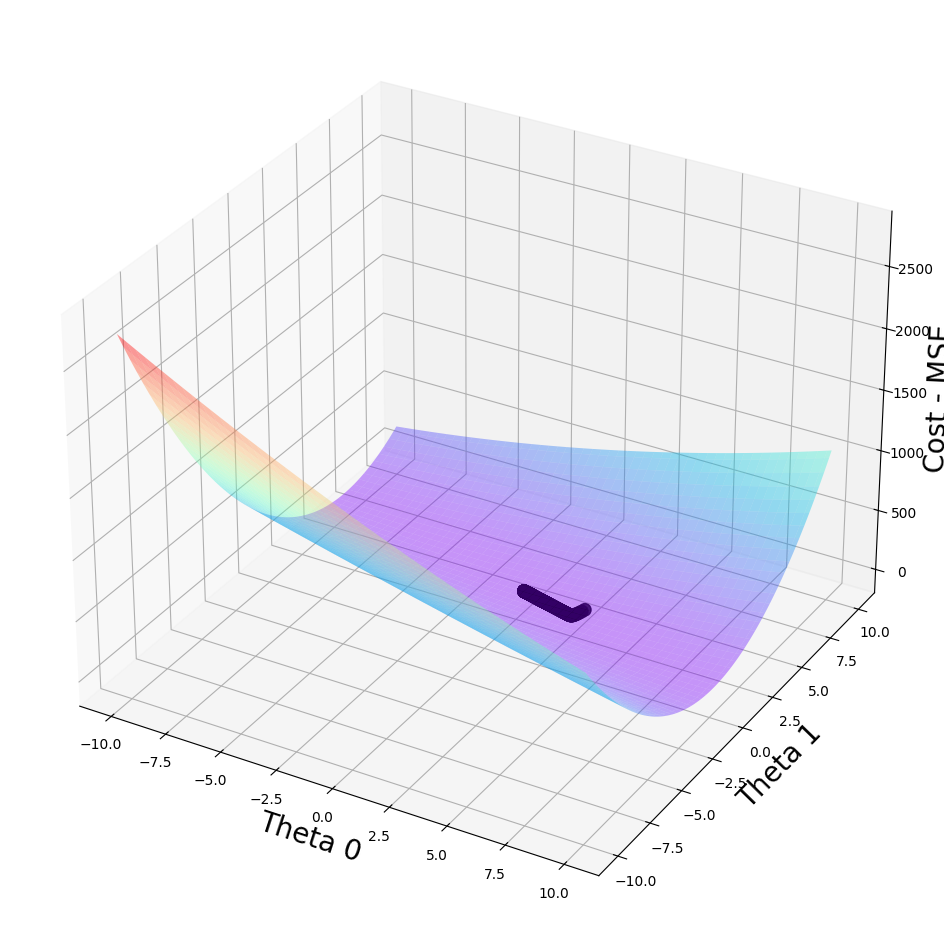

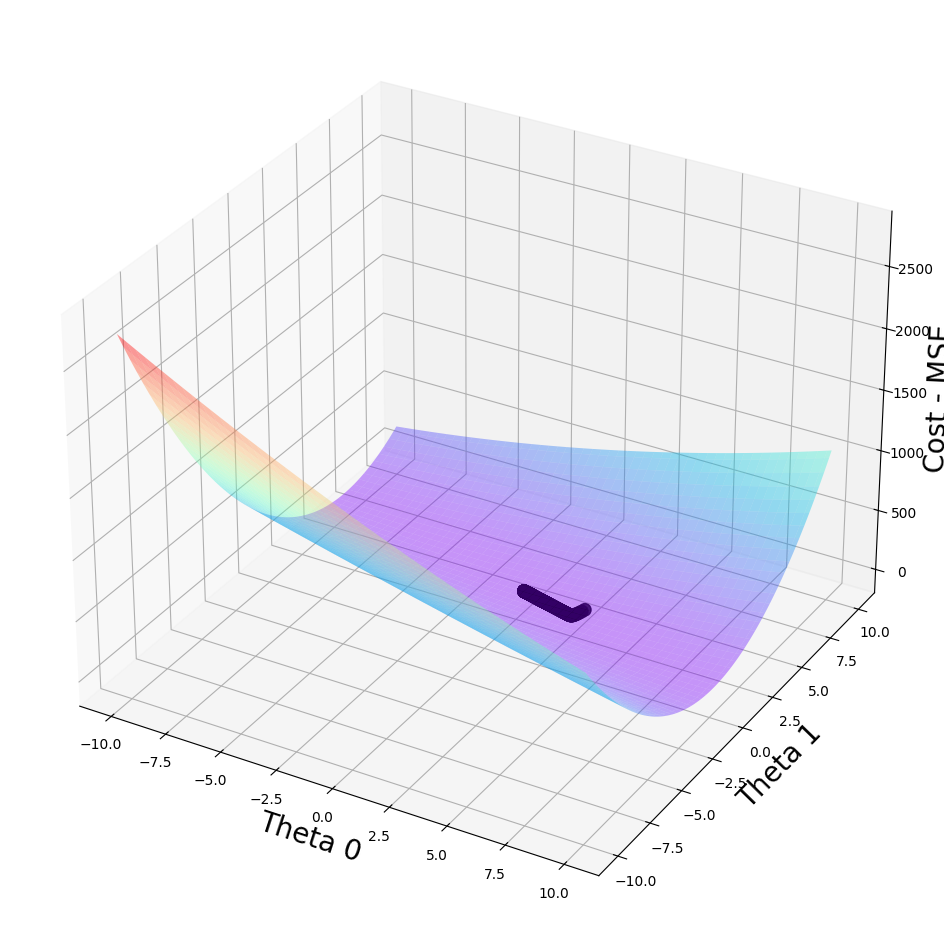

In [44]:
# Create a figure and a 3D axis
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')  # Use add_subplot() with projection='3d'

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Scatter plot of the values of theta0 and theta1 from the gradient descent
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')

# Surface plot of the cost function
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)

plt.show()

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Example data (replace with your actual data)
x_5 = np.array([1, 2, 3, 4, 5])
y_5 = np.array([3, 6, 9, 12, 15])

# Mean Squared Error function
def mse(true_values, predicted_values):
    return np.mean((true_values - predicted_values) ** 2)

# Gradient function
def grad(x, y, thetas):
    theta_0, theta_1 = thetas
    y_pred = theta_0 + theta_1 * x
    grad_theta_0 = (2 / len(x)) * np.sum(y_pred - y)
    grad_theta_1 = (2 / len(x)) * np.sum((y_pred - y) * x)
    return np.array([grad_theta_0, grad_theta_1])

# Gradient descent setup
multiplier = 0.01
thetas = np.array([2.9, 2.9])  # Initial values for theta_0 and theta_1

# Collect data points for the scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)

# Perform gradient descent
for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(mse_vals, mse(y_5, thetas[0] + thetas[1] * x_5))

# Grid for surface plot
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-10, 10, 100)
plot_t0, plot_t1 = np.meshgrid(theta0_vals, theta1_vals)

# Calculate the MSE (cost) for each combination of theta0 and theta1
plot_cost = np.zeros(plot_t0.shape)
for i in range(plot_t0.shape[0]):
    for j in range(plot_t0.shape[1]):
        plot_cost[i, j] = mse(y_5, plot_t0[i, j] + plot_t1[i, j] * x_5)

# Plotting the results
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')  # Create 3D axis

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Scatter plot of the values of theta0 and theta1 from the gradient descent
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')

# Surface plot of the cost function
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)

plt.show()
